Dataset link --> https://www.kaggle.com/datasets/altruistdelhite04/gold-price-data

# Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Loading the dataset

In [2]:
df = pd.read_csv('gld_price_data.csv')

In [3]:
# first 5 rows of the dataset
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# last 5 rows of the dataset
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
# number of rows and columns
print("Number of rows", df.shape[0])
print("Number of columns", df.shape[1])

Number of rows 2290
Number of columns 6


In [6]:
# basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
# checking for null values
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
# statistical infrmation about the dataset
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


# Target column

<Axes: xlabel='GLD', ylabel='Density'>

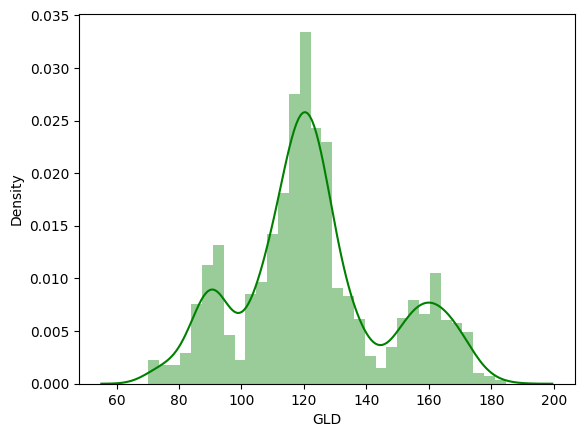

In [9]:
# checking the distribution of the Gold Price
sns.distplot(df['GLD'],color='green')

# Splitting the data into independent & dependent feature

In [10]:
x = df.drop(['Date','GLD'],axis=1)
Y = df['GLD']

# Standard Scaler

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [12]:
X = scaler.fit_transform(x)

In [13]:
print(X)

[[-0.39914541  2.38880956 -0.6917197   1.42975293]
 [-0.39914541  2.38368652 -0.67691224  1.45103511]
 [-0.46760428  2.32938091 -0.69355301  1.45864621]
 ...
 [ 2.05926403 -0.89307824 -0.61274655 -0.69876145]
 [ 2.0728668  -0.89461519 -0.63813078 -0.68838269]
 [ 2.06448555 -0.89329341 -0.65305106 -0.77266741]]


In [14]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


# Splitting the data into train & test

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [16]:
print(X.shape, x_train.shape, x_test.shape)

print(Y.shape, y_train.shape, y_test.shape)

(2290, 4) (1832, 4) (458, 4)
(2290,) (1832,) (458,)


# Random Forest Regressor

In [17]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

In [18]:
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# Evaluation Metrics

In [19]:
from sklearn.metrics import r2_score, mean_squared_error

In [20]:
score = r2_score(y_test, y_pred)
print("R2 score", score)

R2 score 0.9877810664547533


In [21]:
mse = mean_squared_error(y_test, y_pred)
print("MSE", mse)

MSE 6.448546656837943


# Comparing the actual values & predicted values

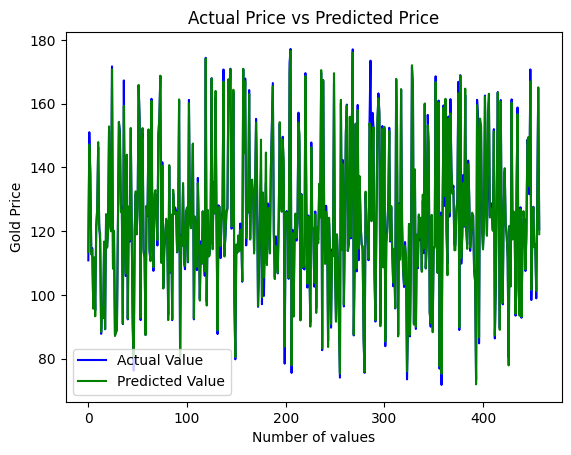

In [22]:
Y_test = list(y_test)
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(y_pred, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

# Prediction

In [23]:
new_pred = model.predict([[2671.919922,14.0600,15.5100,1.186789]])
print("Gold price",new_pred)

Gold price [148.45889906]


# Saving the Model Using Joblib

In [24]:
# training with the whole data

rf = RandomForestRegressor()
rf.fit(X, Y)

RandomForestRegressor()

In [25]:
import joblib

joblib.dump(rf,'gold_price_rf_model')

['gold_price_rf_model']

In [26]:
Model = joblib.load('gold_price_rf_model')

In [27]:
Model.predict([[2671.919922,14.0600,15.5100,1.186789]])

array([149.11970006])